In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


/home/bhat/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [3]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [4]:
# Define the directory path where the files are located
directory_path=[]

#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss/LOGS_burning_normal_1,2_approx21/')
#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_entropy/LOGS_011_approx21_normal_2.0timesni56_HELM/')
#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_entropy/LOGS_094_approx21_normal_2.0timesni56/')
#directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy/LOGS_085_approx21_normal_2.0timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^7/LOGS_064_10^7_approx21_tail_2.0timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^7/LOGS_085_10^7_approx21_tail_2.0timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^7/LOGS_095_10^7_approx21_tail_2.0timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^7/LOGS_011_10^7_approx21_tail_2.0timesni56_HELM/')



# HEre I plot the difference in HR diagram 

0.64
0.8499251835599058
0.9468585666628732
1.1


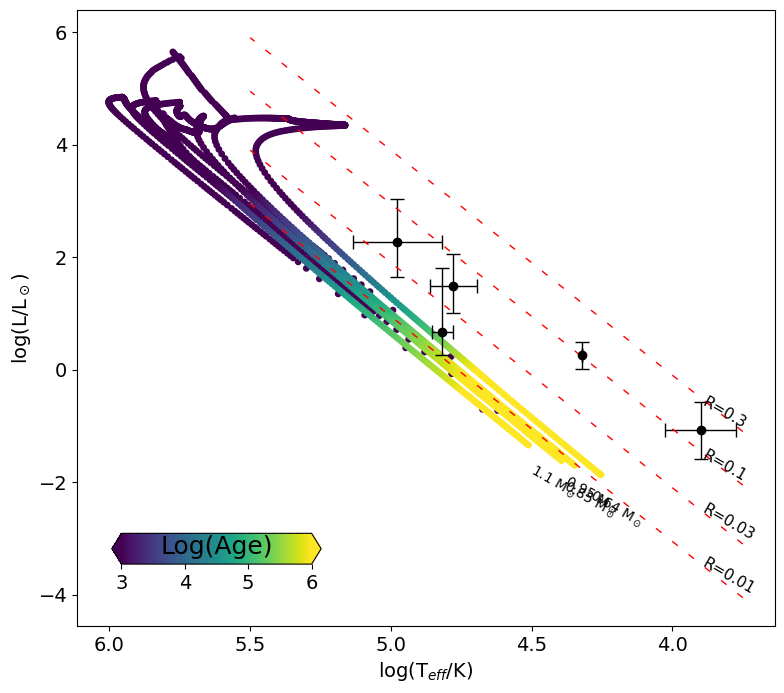

In [7]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter(h.log_Teff, h.log_L,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.9),rotation=-30,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.8),rotation=-30,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.9),rotation=-30,fontsize=10)
    i=i+1
    
radii_d6=np.array([0.104,0.052,0.051,0.017])#J1235, J0927, J0546, J1332
radii_d6_error_plus=np.array([0.026,0.025,0.029,0.021])
radii_d6_error_minus=np.array([0.030,0.020,0.021,0.007])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/temp_d6[i],yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#

#plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5,c='white')#
#plt.errorbar(np.log10(65657),1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(95000),2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(60000),0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5,c='white')
plt.errorbar(3.9,-1.08,xerr=([0.125],[0.125]),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(L/L$_\odot$)')
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]-0.3),rotation=-30,fontsize=11)

cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed



'\n\n\n #Opacities start after 100 years (unless mass loss -15)\naxs[0].plot(np.log10(h5.star_age), h5.log_L)\naxs[0].plot(np.log10(h6.star_age), h6.log_L)\naxs[0].plot(np.log10(h7.star_age), h7.log_L)\naxs[0].plot(np.log10(h8.star_age), h8.log_L)\naxs[0].set_xlim(0,8)\n\naxs[0].legend((\'Ni-56 and He-4\',\'Ni-56 and 5He-4\',\'Ni-56 and He-4 (New Opacity)\',\n               \'Ni-56 and 5He-4 (New Opacity)\',\'Ni-56 and He-4 (New Deep Opacity)\'))\n#axs[1].plot(np.log10(h.star_age), h.log_R)\n#axs[1].plot(np.log10(h2.star_age), h2.log_R)\n#axs[1].plot(np.log10(h3.star_age), h3.log_R)\naxs[1].plot(np.log10(h4.star_age), h4.log_R)\naxs[1].plot(np.log10(h5.star_age), h5.log_R)\naxs[1].plot(np.log10(h6.star_age), h6.log_R)\naxs[1].plot(np.log10(h7.star_age), h7.log_R)\naxs[1].plot(np.log10(h8.star_age), h8.log_R)\naxs[1].plot((0,8),(-2,-2))\naxs[1].plot((0,8),(-1.52,-1.52))\naxs[1].plot((0,8),(-1,-1))\naxs[1].plot((0,8),(-0.52,-0.52))\naxs[1].set_xlim(0,8)\naxs[1].set_ylim(-2,1)\n\naxs[1].s

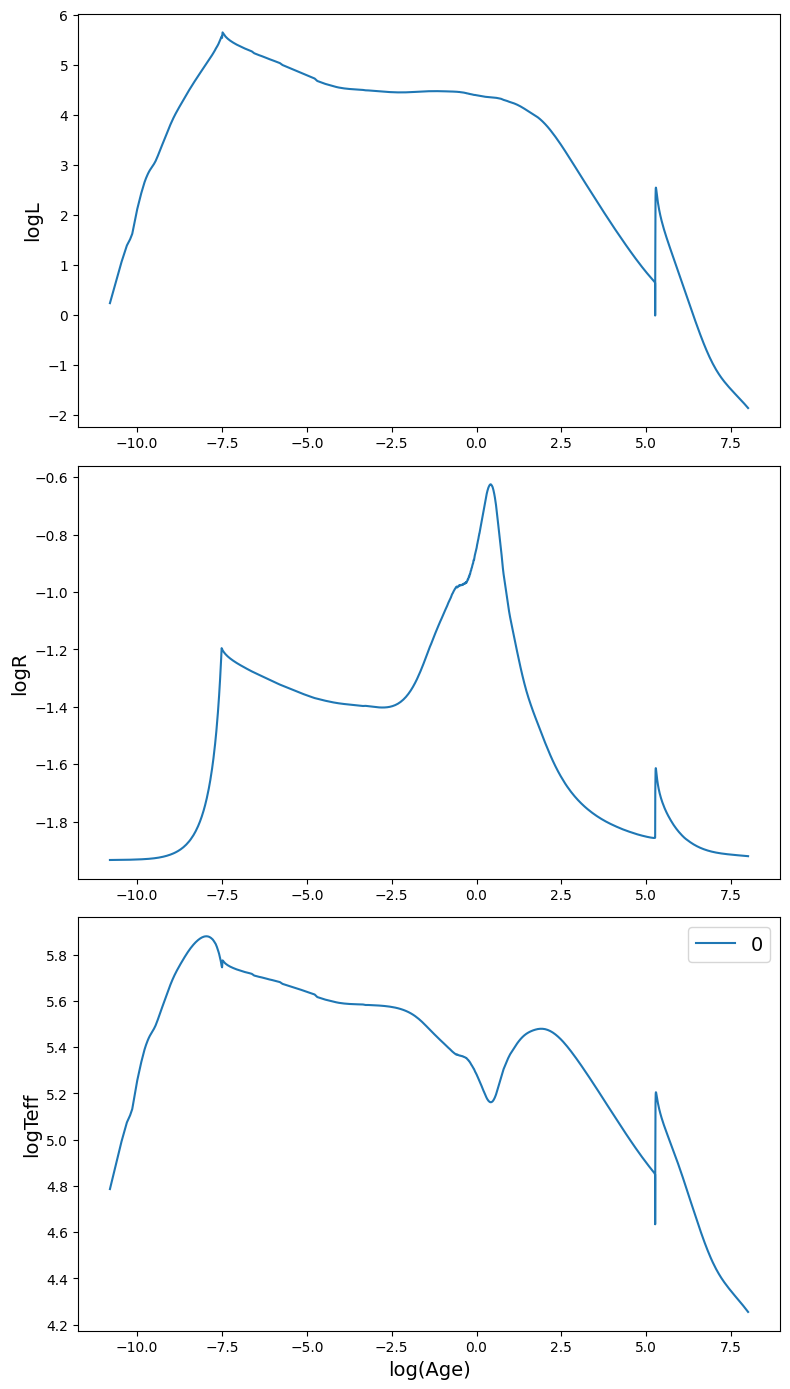

In [8]:

plt.style.use('default')
figs, axs=plt.subplots(3,1,figsize=(8,14))
#axs[0].plot(np.log10(h.star_age), h.log_L)
#axs[0].plot(np.log10(h2.star_age), h2.log_L)
#axs[0].plot(np.log10(h3.star_age), h3.log_L)

for i in range(1):
    for directory in directory_path:
        h = MesaData(os.path.join(directory, 'history.data'))
        axs[i].plot(np.log10(h.star_age), h.log_L)
        axs[i].set_ylabel("logL",fontsize=14)
        axs[i+1].plot(np.log10(h.star_age), h.log_R)
        axs[i+1].set_ylabel("logR",fontsize=14)
        axs[i+2].plot(np.log10(h.star_age), h.log_Teff)
        axs[i+2].set_ylabel("logTeff",fontsize=14)

plt.xlabel('log(Age)',fontsize=14)
plt.tight_layout()
plt.legend(('0.64'),fontsize=14,loc='best')
'''


 #Opacities start after 100 years (unless mass loss -15)
axs[0].plot(np.log10(h5.star_age), h5.log_L)
axs[0].plot(np.log10(h6.star_age), h6.log_L)
axs[0].plot(np.log10(h7.star_age), h7.log_L)
axs[0].plot(np.log10(h8.star_age), h8.log_L)
axs[0].set_xlim(0,8)

axs[0].legend(('Ni-56 and He-4','Ni-56 and 5He-4','Ni-56 and He-4 (New Opacity)',
               'Ni-56 and 5He-4 (New Opacity)','Ni-56 and He-4 (New Deep Opacity)'))
#axs[1].plot(np.log10(h.star_age), h.log_R)
#axs[1].plot(np.log10(h2.star_age), h2.log_R)
#axs[1].plot(np.log10(h3.star_age), h3.log_R)
axs[1].plot(np.log10(h4.star_age), h4.log_R)
axs[1].plot(np.log10(h5.star_age), h5.log_R)
axs[1].plot(np.log10(h6.star_age), h6.log_R)
axs[1].plot(np.log10(h7.star_age), h7.log_R)
axs[1].plot(np.log10(h8.star_age), h8.log_R)
axs[1].plot((0,8),(-2,-2))
axs[1].plot((0,8),(-1.52,-1.52))
axs[1].plot((0,8),(-1,-1))
axs[1].plot((0,8),(-0.52,-0.52))
axs[1].set_xlim(0,8)
axs[1].set_ylim(-2,1)

axs[1].set_ylabel("logR",fontsize=12)
#axs[2].plot(np.log10(h.star_age), h.log_Teff)
#axs[2].plot(np.log10(h2.star_age), h2.log_Teff)
#axs[2].plot(np.log10(h3.star_age), h3.log_Teff)
axs[2].plot(np.log10(h4.star_age), h4.log_Teff)
axs[2].plot(np.log10(h5.star_age), h5.log_Teff)
axs[2].plot(np.log10(h6.star_age), h6.log_Teff)
axs[2].plot(np.log10(h7.star_age), h7.log_Teff)
axs[2].plot(np.log10(h8.star_age), h8.log_Teff)

axs[2].set_ylabel("logTeff",fontsize=12)
plt.xlim(0,8)

# set axis labels
plt.xlabel('log(Star Age)',fontsize=12)
plt.tight_layout()

#figs.savefig("../Long_Evolve_Ni_opacity_massloss/Plots_burning/comparison_withobservations.pdf")
fig=plt.figure()
#plt.plot(h.log_Teff, h.log_L)
#plt.plot(h2.log_Teff, h2.log_L)
#plt.plot(h3.log_Teff, h3.log_L)
plt.plot(h4.log_Teff, h4.log_L)
plt.plot(h5.log_Teff, h5.log_L)
plt.plot(h6.log_Teff, h6.log_L)
plt.plot(h7.log_Teff, h7.log_L)
plt.plot(h8.log_Teff, h8.log_L)
plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5)
plt.errorbar(4.90,1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5)
plt.errorbar(5.11,2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5)
plt.errorbar(4.84,0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5)
plt.errorbar(3.9,-1.08,xerr=([0.125],[0.125]),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5) #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.xlabel('logTeff')
plt.ylabel('logL')

plt.legend(('Ni-56 and He-4','Ni-56 and 5He-4','Ni-56 and He-4 (New Opacity)',
            'Ni-56 and 5He-4 (New Opacity)','Ni-56 and He-4 (New Deep Opacity)','J1235','J0927','J0546','J1332','D6(1-3)'
            ),
           fontsize=10,loc='upper right')



# invert the x-axis
plt.gca().invert_xaxis()
#plt.scatter(4.322,-4.408)
#plt.scatter(4.903,-4.334)
#plt.scatter(5.113,-4.4508)
#plt.scatter(4.845,-5.264)
#plt.ylim(-6,6)
plt.tight_layout()
plt.savefig("../Long_Evolve_Ni_opacity_massloss/Plots_burning/HR_withobservations_2.pdf")
#plt.savefig("Plots_burning/HR_1d8.png")
'''

# Composition

In [ ]:
h2 = np.genfromtxt('/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/composition.dat',skip_header=1)
h = MesaData(os.path.join(directory_path, 'profile11.data'))
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
plt.plot(h2[:,0],np.log10(h2[:,3]))
plt.plot(h2[:,0],np.log10(h2[:,4]))
plt.plot(h2[:,0],np.log10(h2[:,5]))
plt.plot(h2[:,0],np.log10(h2[:,6]))
plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'$X_q$')
plt.ylabel(r'$X_n$')